<h1 style="text-align: center; font-size: 2.5em; color: #2E8B57;">Energy Consumption EDA and Prediction</h1>
<hr style="border: 1px solid #2E8B57;"/>

# 1. IMPORTING LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.simplefilter('ignore')

# 2. LOAD THE DATA

In [5]:
df_train = pd.read_csv(r"C:\Users\Acer\Downloads\test_energy_data (1).csv")

In [6]:
df_train.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [8]:
df_train.isna().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

# 3. EDA

## Histogram for Energy Consumption

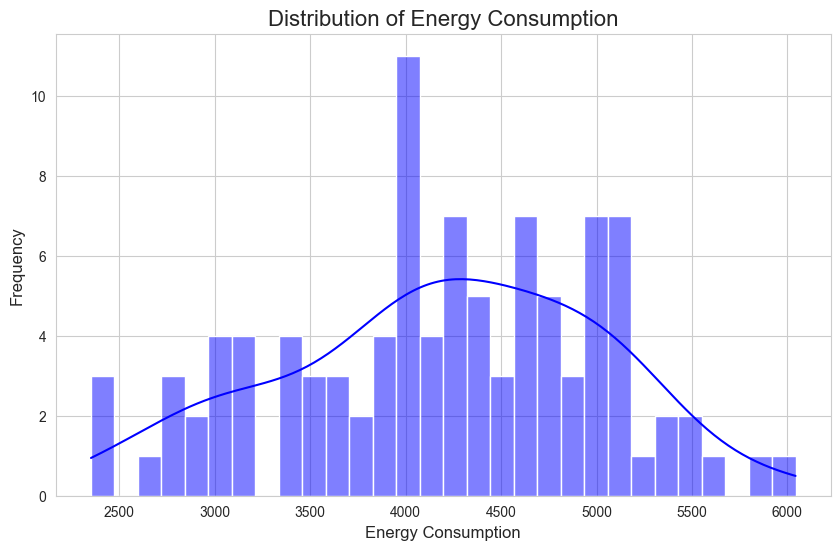

In [9]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_train['Energy Consumption'], kde=True, color='blue', bins=30)
plt.title('Distribution of Energy Consumption', fontsize=16)
plt.xlabel('Energy Consumption', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

## Average Energy Consumption by Building Type

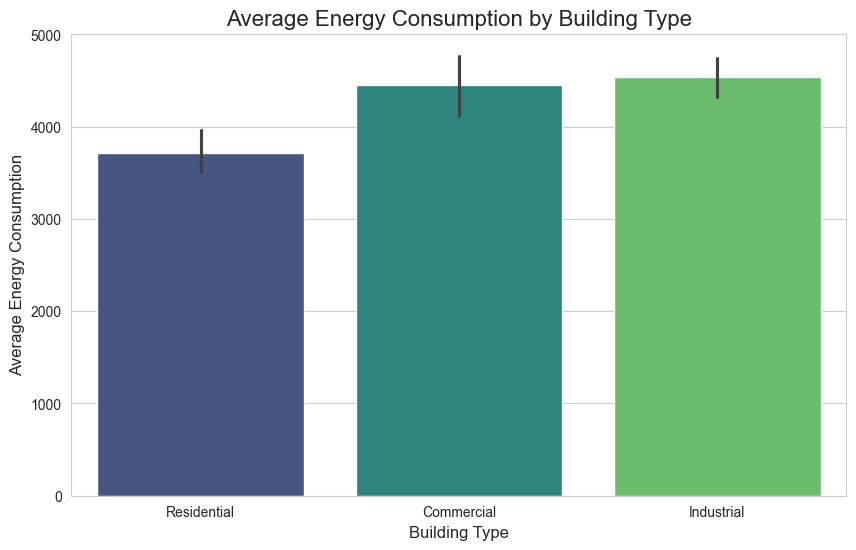

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_train, x='Building Type', y='Energy Consumption', palette='viridis')
plt.title('Average Energy Consumption by Building Type', fontsize=16)
plt.xlabel('Building Type', fontsize=12)
plt.ylabel('Average Energy Consumption', fontsize=12)
plt.show()

## Square Footage vs Energy Consumption

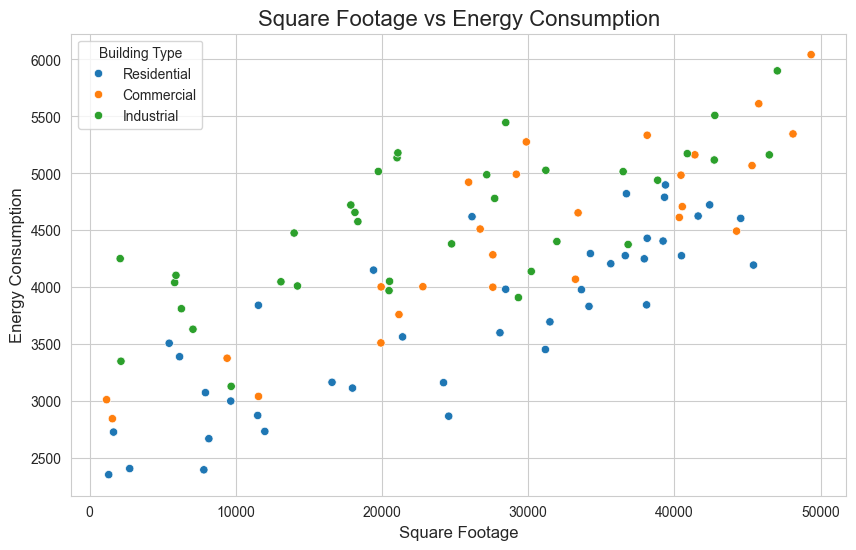

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='Square Footage', y='Energy Consumption', hue='Building Type', palette='tab10')
plt.title('Square Footage vs Energy Consumption', fontsize=16)
plt.xlabel('Square Footage', fontsize=12)
plt.ylabel('Energy Consumption', fontsize=12)
plt.legend(title='Building Type')
plt.show()

# 4. MODEL BUILDING

In [12]:
df_train.head()

,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


## One-Hot Encoding for Categorical features

In [13]:
df_train_encoded = pd.get_dummies(df_train, columns=['Building Type', 'Day of Week'], drop_first=True)

df_train_encoded.head()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption,Building Type_Industrial,Building Type_Residential,Day of Week_Weekend
0,24563,15,4,28.52,2865.57,False,True,False
1,27583,56,23,23.07,4283.80,False,False,True
2,45313,4,44,33.56,5067.83,False,False,False
3,41625,84,17,27.39,4624.30,False,True,True
4,36720,58,47,17.08,4820.59,False,True,False


## 5. Linear Regression

In [15]:
X = df_train_encoded.drop(columns=['Energy Consumption'])
y = df_train_encoded['Energy Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"RMSE for Linear Regression: {rmse_lr}")

RMSE for Linear Regression: 0.01585266333314854


In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred_lr)

0.9999999996232116